In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
sns.set()

Names of the "good" farms based on the number of milking events.

In [54]:
farmNames = ["ad0a39f5", "752efd72", "5c06d92d", "540275a1", "a624fb9a", "f454e660", "ab18b151"]

Alternative farm names

In [55]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}

Loading the relevant weather data into a dictionary.

This script uses the daily weather files generated by "weatherPreProcessing.ipynb".


In [56]:
farms = {}
for name in farmNames:
    fName = f"{name}_weather_daily.csv"
    df = pd.read_csv(fName)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df = df.set_index("Timestamp")
    df["T_F_mean"] = df["T_C_mean"] * 1.8 + 32
    df["ratio"] = df["THI_mean"]/df["T_F_mean"]
    farms[rDict[name]] = df

farmNames = sorted(list(farms.keys()))



A simple summary of the weather for each farm.
Based on daily mean values.

In [57]:
def weatherSummary(farm):
    mTemp = round(farms[farm]["T_C_mean"].mean(), 2)
    sTemp = round(farms[farm]["T_C_mean"].std(), 2)
    print(f"{farm} has an average temperature of {mTemp}\N{DEGREE SIGN}C and a standard deviation of {sTemp}\N{DEGREE SIGN}C")

    minTemp = round(farms[farm]["T_C_mean"].min(), 2)
    maxTemp = round(farms[farm]["T_C_mean"].max(), 2)
    print(f"It had a minimum temperature of {minTemp}\N{DEGREE SIGN}C and a maxiumum of {maxTemp}\N{DEGREE SIGN}C")

    mTHI = round(farms[farm]["THI_mean"].mean(), 2)
    sTHI = round(farms[farm]["THI_mean"].std(), 2)
    print(f"The average THI is {mTHI} with a standard deviation of {sTHI}")
    mHum = round(farms[farm]["r_sfc_mean"].mean(), 2)
    sHum = round(farms[farm]["r_sfc_mean"].std(), 2) 
    print(f"The average relative humidity is {mHum} with a standard deviation of {sHum} \n")



In [58]:
for name in farmNames:
    weatherSummary(name)

Farm 1 has an average temperature of 6.9°C and a standard deviation of 7.58°C
It had a minimum temperature of -16.89°C and a maxiumum of 24.79°C
The average THI is 43.45 with a standard deviation of 15.23
The average relative humidity is 0.79 with a standard deviation of 0.15 

Farm 2 has an average temperature of 7.98°C and a standard deviation of 6.9°C
It had a minimum temperature of -11.79°C and a maxiumum of 24.78°C
The average THI is 45.91 with a standard deviation of 13.66
The average relative humidity is 0.83 with a standard deviation of 0.13 

Farm 3 has an average temperature of 7.83°C and a standard deviation of 7.03°C
It had a minimum temperature of -11.18°C and a maxiumum of 22.96°C
The average THI is 45.25 with a standard deviation of 14.17
The average relative humidity is 0.79 with a standard deviation of 0.14 

Farm 5 has an average temperature of 8.18°C and a standard deviation of 7.64°C
It had a minimum temperature of -15.3°C and a maxiumum of 25.79°C
The average THI i

Plotting weather data for each farm

In [59]:
def plotWeather(param, yLab, titl):
    for farm in farmNames:
        sns.lineplot(farms[farm][param], alpha = 0.7)
        plt.xticks(rotation=45)
        plt.xlabel("")
        plt.ylabel(yLab)
        plt.title(titl)
        plt.legend(farmNames, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


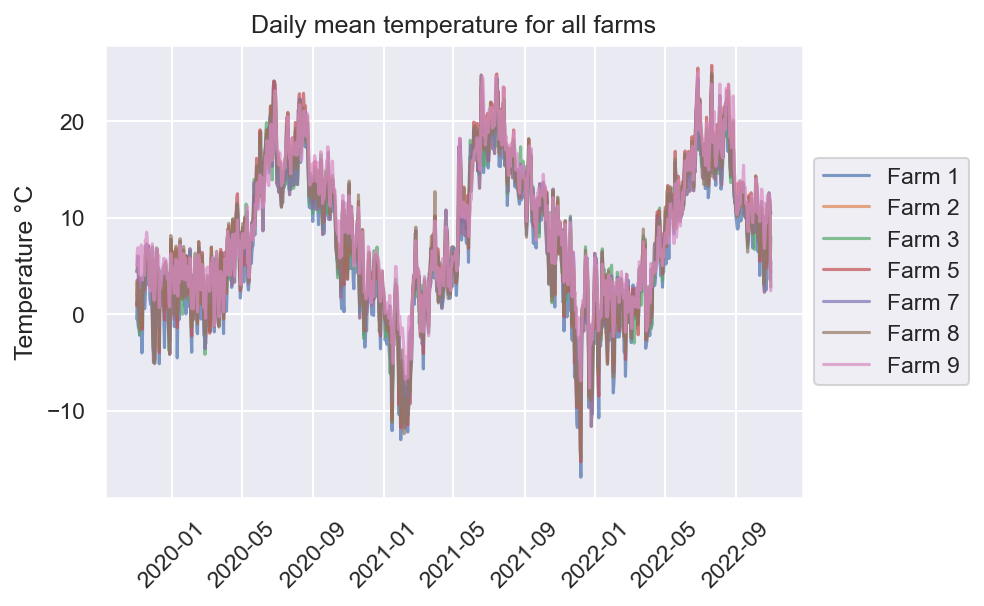

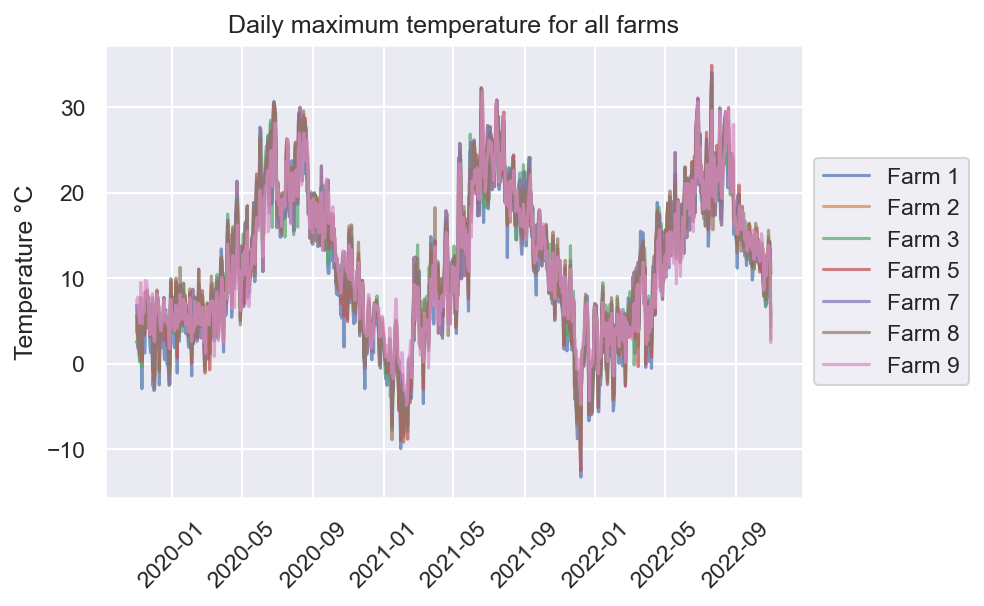

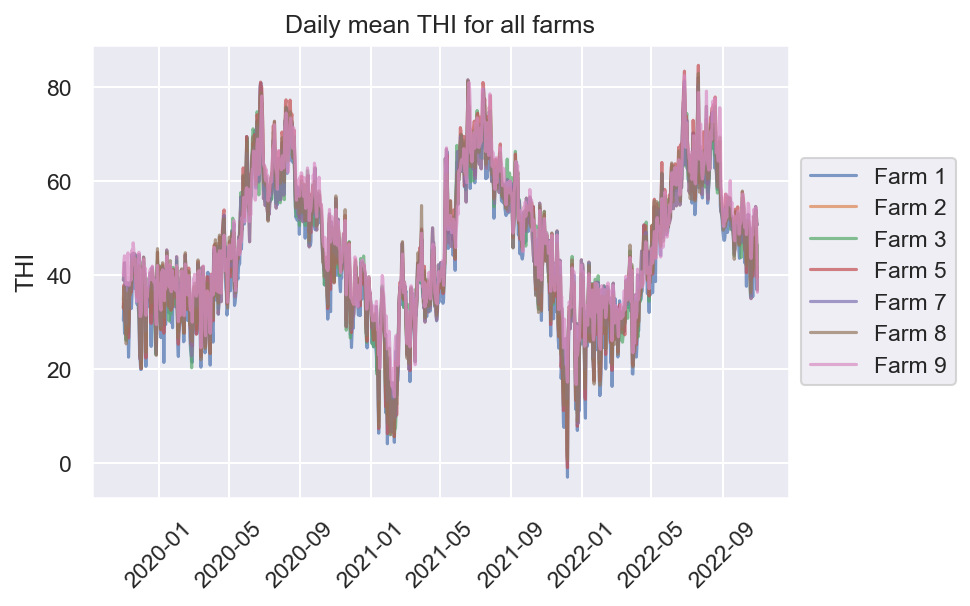

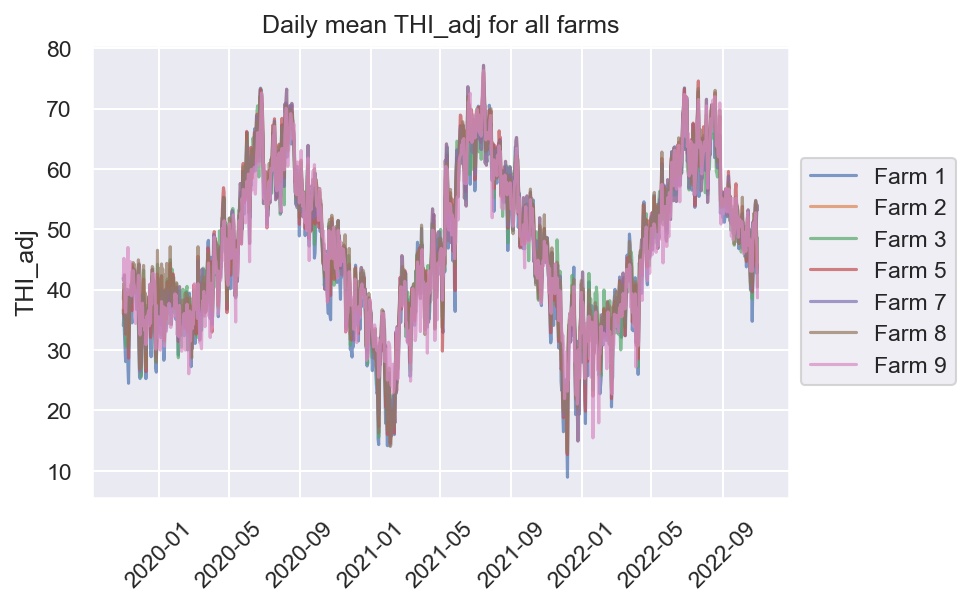

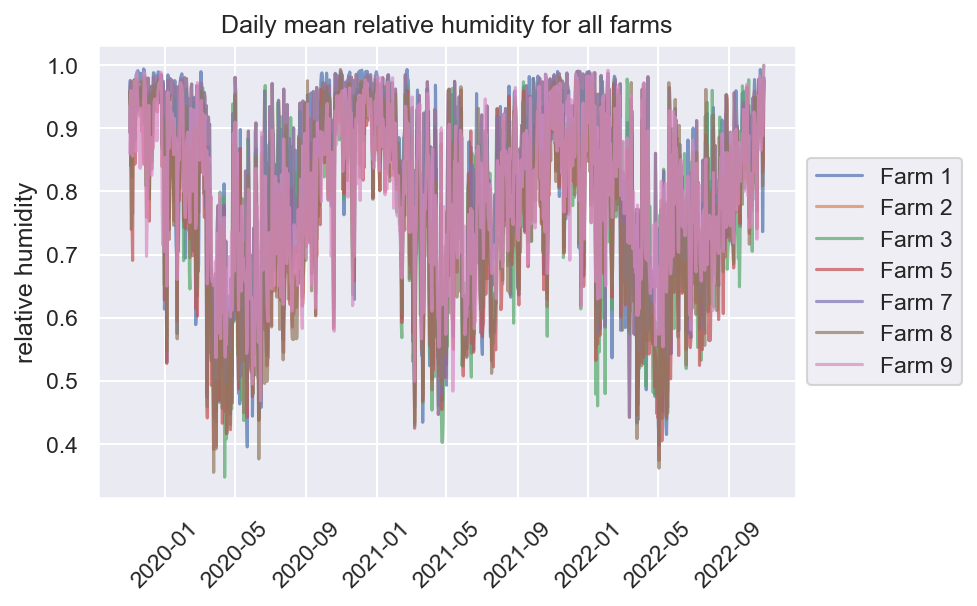

In [60]:
plotWeather("T_C_mean", "Temperature \N{DEGREE SIGN}C", "Daily mean temperature for all farms")
plotWeather("T_C_max", "Temperature \N{DEGREE SIGN}C", "Daily maximum temperature for all farms")
plotWeather("THI_mean", "THI", "Daily mean THI for all farms")
plotWeather("THI_adj_mean", "THI_adj", "Daily mean THI_adj for all farms")
plotWeather("r_sfc_mean", "relative humidity", "Daily mean relative humidity for all farms")

PLotting the ratio between Temperature and THI.

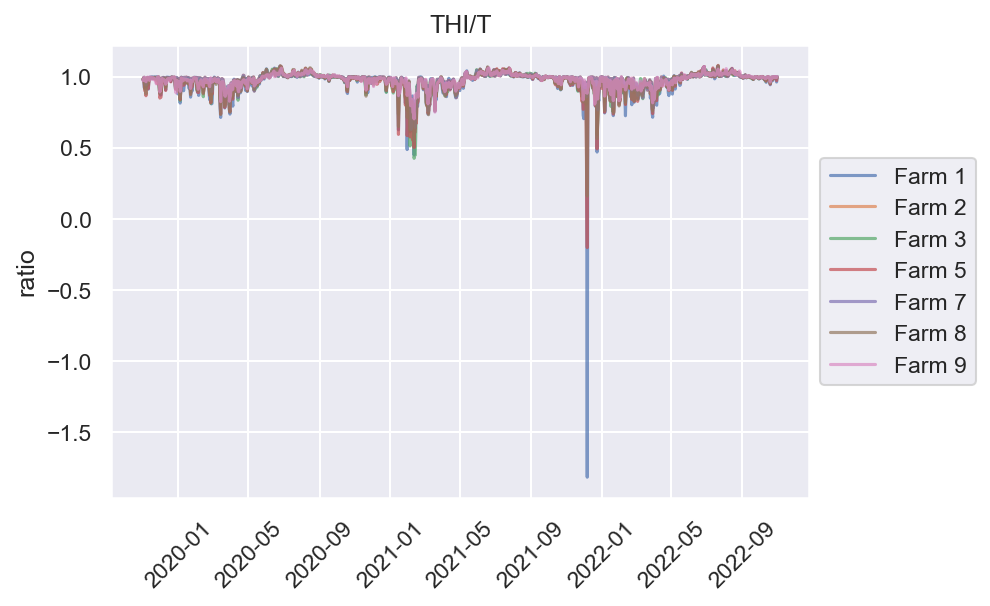

In [62]:
for farm in farmNames:
    sns.lineplot(farms[farm]["ratio"], alpha = 0.7)
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("ratio")
    plt.title("THI/T")
    plt.legend(farmNames, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Hottest months

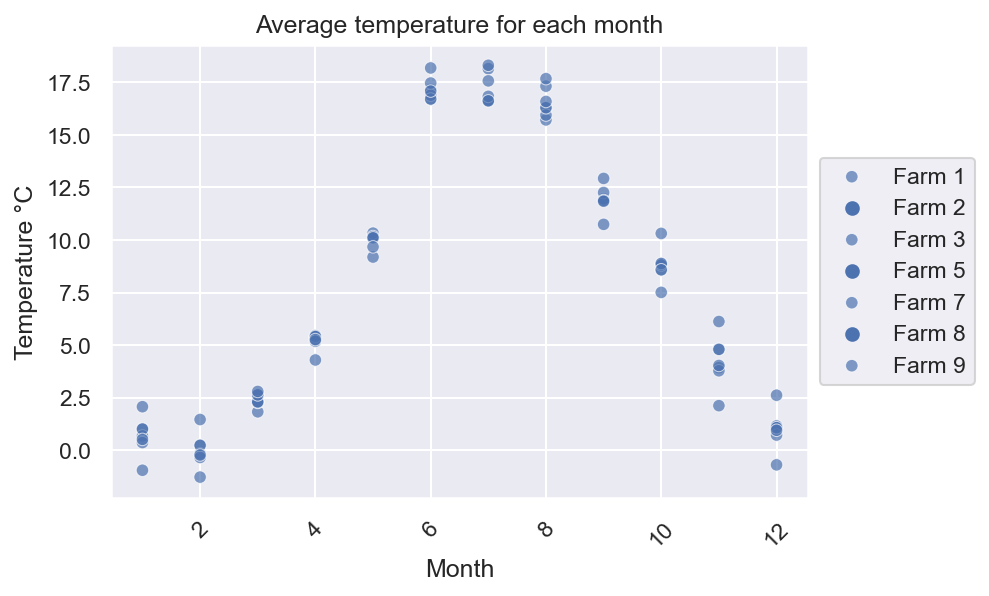

In [103]:
for farm in farmNames:
    dailyWeather = farms[farm]
    aT = dailyWeather.groupby([dailyWeather.index.month]).agg({'T_C_mean': 'mean'})
    sns.scatterplot(aT, alpha = 0.7)
    plt.xticks(rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Temperature \N{DEGREE SIGN}C")
    plt.title("Average temperature for each month")
    plt.legend(farmNames, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Conclusion:
1. The temperature is fairly similar in each farm
2. THI and THI_adj follows a very similar pattern to Temperature.
3. The warmest months of the year are june, july and august